<a href="https://colab.research.google.com/github/Helios109/Verylimitedtoystore/blob/main/Copy_of_3_Shops_orders_analysis_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 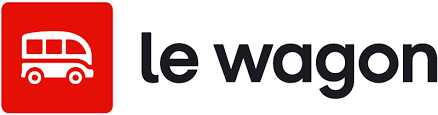

# Shop orders analysis

In this challenge, you will analyze data from [Sumup](https://www.sumup.com/fr-fr/) who wants to analyse its restaurant orders and categorize them.


Upload [Tiller_order_data.csv](https://drive.google.com/file/d/1dVuD1hB3UnX5xhCHFMQ5R4iBdMdJMK4a/view?usp=sharing) in Colab and load it in a DataFrame `df_order`


## Exploratory Analysis


In [5]:
import pandas as pd
import gdown

url = 'https://drive.google.com/uc?id=1dVuD1hB3UnX5xhCHFMQ5R4iBdMdJMK4a'

output = 'df_order.csv'

gdown.download(url, output, quiet=False)

df_order = pd.read_csv(output)

print(df_order)





Downloading...
From: https://drive.google.com/uc?id=1dVuD1hB3UnX5xhCHFMQ5R4iBdMdJMK4a
To: /content/df_order.csv
100%|██████████| 17.1M/17.1M [00:00<00:00, 119MB/s]


        id_order  id_store  id_table  id_waiter  id_customer  \
0       55538867      8052       NaN        NaN          NaN   
1       56035309      8052       NaN        NaN          NaN   
2       55550051      8052       NaN        NaN          NaN   
3       57000119      8052       NaN    16199.0          NaN   
4       55558817      8052       NaN        NaN          NaN   
...          ...       ...       ...        ...          ...   
117299  61630471      4542       NaN        NaN          NaN   
117300  76772730      4542       NaN        NaN          NaN   
117301  77799227      4542       NaN        NaN          NaN   
117302  60627160      4542       NaN        NaN          NaN   
117303  93223821      4542       NaN        NaN          NaN   

                                 id_external  id_device  \
0       0425716B-EFF4-41CA-AEA1-839104F36833    15327.0   
1       75E41FE2-64FF-41D3-954C-A7DE4AA887EF    15327.0   
2       F6051A05-C9AC-4033-BF72-BB5149B8F439    15327.

<ipython-input-5-e2e9e62c2724>:14: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_order = pd.read_csv(output)


What does a row represent? What information can you find?

Each row represents a single order. You could find data types, missing values, unique identifiers etc.

What are the different statuses of an order? How many orders are there per status?   

In [7]:
order_statuses = df_order['dim_status'].unique()

orders_per_status = df_order['dim_status'].value_counts()

print("Different statuses of orders:", order_statuses)
print("\nNumber of orders per status:")
print(orders_per_status)


Different statuses of orders: ['CLOSED' 'IN_PROGRESS']

Number of orders per status:
dim_status
CLOSED         116939
IN_PROGRESS       365
Name: count, dtype: int64


What is the proportion of orders ?  \
You can use the `.value_counts()` function, with the optional argument `normalize=True`

In [9]:
proportion_orders_per_status = df_order['dim_status'].value_counts(normalize=True)

print("Proportion of orders per status:")
print(proportion_orders_per_status)


Proportion of orders per status:
dim_status
CLOSED         0.996888
IN_PROGRESS    0.003112
Name: proportion, dtype: float64


How many restaurants are there? What are their ids?

In [11]:
num_restaurants = df_order['id_store'].nunique()

restaurant_ids = df_order['id_store'].unique()

print("Number of restaurants:", num_restaurants)
print("Restaurant IDs:", restaurant_ids)


Number of restaurants: 10
Restaurant IDs: [8052 8347 8283 9084 4337  360 1796 7965 6293 4542]


## Aggregations

Compute the total turnover per restaurant. Which restaurant has the highest turnover?


In [14]:
total_turnover_per_restaurant = df_order.groupby('id_store')['m_cached_price'].sum()

restaurant_highest_turnover = total_turnover_per_restaurant.idxmax()
highest_turnover = total_turnover_per_restaurant.max()

print("Total turnover per restaurant:")
print(total_turnover_per_restaurant)
print("\nRestaurant with the highest turnover:", restaurant_highest_turnover)
print("Highest turnover:", highest_turnover)


Total turnover per restaurant:
id_store
360      386934.14
1796     321099.69
4337     865847.30
4542     243789.69
6293     359718.00
7965    1138585.95
8052     327758.85
8283     369822.82
8347         23.00
9084     479040.75
Name: m_cached_price, dtype: float64

Restaurant with the highest turnover: 7965
Highest turnover: 1138585.95


Restaurant with the highest turnover: 7965
Highest turnover: 1138585.95

Count the number of orders per restaurant. Which restaurant has the most orders? Is it the same as the one with the highest turnover?


In [16]:
orders_per_restaurant = df_order['id_store'].value_counts()

restaurant_most_orders = orders_per_restaurant.idxmax()
most_orders = orders_per_restaurant.max()

print("Number of orders per restaurant:")
print(orders_per_restaurant)
print("\nRestaurant with the most orders:", restaurant_most_orders)
print("Number of orders:", most_orders)

#Its not the same as the one with the highest turnover.


Number of orders per restaurant:
id_store
1796    27349
4337    20003
4542    17641
6293    16103
8283    10023
7965     9091
9084     7804
8052     4906
360      4383
8347        1
Name: count, dtype: int64

Restaurant with the most orders: 1796
Number of orders: 27349


Calculate the average price of an order for each restaurant. Do you think you are dealing with similar categories of restaurants ?


In [18]:
average_price_per_order = df_order.groupby('id_store')['m_cached_price'].mean()

print("Average price of an order for each restaurant:")
print(average_price_per_order)

# I don't believe we are are dealing with similar categories of restaurants price wise.


Average price of an order for each restaurant:
id_store
360      88.280662
1796     11.740820
4337     43.285872
4542     13.819494
6293     22.338570
7965    125.243202
8052     66.807756
8283     36.897418
8347     23.000000
9084     61.384002
Name: m_cached_price, dtype: float64


## Column transformations


The problem is that an order may be placed for several people. Instead, we want to know the average price spent by a single person in the restaurant.

Add a column to `df_order`,  representing the price per customer for each order.


In [22]:
df_order['price_per_customer'] = df_order['m_cached_price'] / df_order['m_nb_customer']

print(df_order)


        id_order  id_store  id_table  id_waiter  id_customer  \
0       55538867      8052       NaN        NaN          NaN   
1       56035309      8052       NaN        NaN          NaN   
2       55550051      8052       NaN        NaN          NaN   
3       57000119      8052       NaN    16199.0          NaN   
4       55558817      8052       NaN        NaN          NaN   
...          ...       ...       ...        ...          ...   
117299  61630471      4542       NaN        NaN          NaN   
117300  76772730      4542       NaN        NaN          NaN   
117301  77799227      4542       NaN        NaN          NaN   
117302  60627160      4542       NaN        NaN          NaN   
117303  93223821      4542       NaN        NaN          NaN   

                                 id_external  id_device  \
0       0425716B-EFF4-41CA-AEA1-839104F36833    15327.0   
1       75E41FE2-64FF-41D3-954C-A7DE4AA887EF    15327.0   
2       F6051A05-C9AC-4033-BF72-BB5149B8F439    15327.

Using the previous column, calculate the average price spent by each person in each of the restaurants.

In [26]:
average_price_per_person_per_restaurant = df_order.groupby('id_store')['price_per_customer'].mean()

print("Average price spent by each person in each restaurant:")
print(average_price_per_person_per_restaurant)


Average price spent by each person in each restaurant:
id_store
360           NaN
1796          NaN
4337          NaN
4542    13.821061
6293          NaN
7965          NaN
8052    16.722518
8283    36.901100
8347    11.500000
9084          NaN
Name: price_per_customer, dtype: float64


There seems to be problem with the quality of data, as we can notice the presence of `NaN`for half of our restaurant

Do you have any idea why?


It implies missing or incomplete data in the original DataFrame. Missing values in the 'm_nb_customer' column or missing values in the 'm_cached_price' column for example.

## Cleaning


Fill the 0 values in the `m_nb_customer` column with 1, then eliminate the rows where the `m_cached_price` is 0.

In [24]:
df_order['m_nb_customer'] = df_order['m_nb_customer'].replace(0, 1)

print(df_order)


        id_order  id_store  id_table  id_waiter  id_customer  \
0       55538867      8052       NaN        NaN          NaN   
1       56035309      8052       NaN        NaN          NaN   
2       55550051      8052       NaN        NaN          NaN   
3       57000119      8052       NaN    16199.0          NaN   
4       55558817      8052       NaN        NaN          NaN   
...          ...       ...       ...        ...          ...   
117299  61630471      4542       NaN        NaN          NaN   
117300  76772730      4542       NaN        NaN          NaN   
117301  77799227      4542       NaN        NaN          NaN   
117302  60627160      4542       NaN        NaN          NaN   
117303  93223821      4542       NaN        NaN          NaN   

                                 id_external  id_device  \
0       0425716B-EFF4-41CA-AEA1-839104F36833    15327.0   
1       75E41FE2-64FF-41D3-954C-A7DE4AA887EF    15327.0   
2       F6051A05-C9AC-4033-BF72-BB5149B8F439    15327.

In [25]:
df_order = df_order[df_order['m_cached_price'] != 0]

print(df_order)


        id_order  id_store  id_table  id_waiter  id_customer  \
0       55538867      8052       NaN        NaN          NaN   
1       56035309      8052       NaN        NaN          NaN   
2       55550051      8052       NaN        NaN          NaN   
3       57000119      8052       NaN    16199.0          NaN   
4       55558817      8052       NaN        NaN          NaN   
...          ...       ...       ...        ...          ...   
117299  61630471      4542       NaN        NaN          NaN   
117300  76772730      4542       NaN        NaN          NaN   
117301  77799227      4542       NaN        NaN          NaN   
117302  60627160      4542       NaN        NaN          NaN   
117303  93223821      4542       NaN        NaN          NaN   

                                 id_external  id_device  \
0       0425716B-EFF4-41CA-AEA1-839104F36833    15327.0   
1       75E41FE2-64FF-41D3-954C-A7DE4AA887EF    15327.0   
2       F6051A05-C9AC-4033-BF72-BB5149B8F439    15327.

Recalculate the price_per_customer column and the average price spent by each person in each restaurant.

In [30]:
df_order['price_per_customer'] = df_order['m_cached_price'] / df_order['m_nb_customer']

average_price_per_person_per_restaurant = df_order.groupby('id_store')['price_per_customer'].mean()

print("Average price spent by each person in each restaurant:")
print(average_price_per_person_per_restaurant)


Average price spent by each person in each restaurant:
id_store
360      32.073823
1796     11.832542
4337     43.334787
4542     13.821061
6293     16.810087
7965    102.433918
8052     16.722518
8283     36.901100
8347     11.500000
9084     30.570348
Name: price_per_customer, dtype: float64


## Order duration analysis


Restaurant `7965` has a higher price per person than the rest.  
Let's look at the time spent at the table to determine if it matches the characteristics of a fancy restaurant.




Convert the `date_opened` and `date_closed` columns to **datetime** format.


In [32]:
df_order['date_opened'] = pd.to_datetime(df_order['date_opened'])
df_order['date_closed'] = pd.to_datetime(df_order['date_closed'])

print(df_order)


        id_order  id_store  id_table  id_waiter  id_customer  \
0       55538867      8052       NaN        NaN          NaN   
1       56035309      8052       NaN        NaN          NaN   
2       55550051      8052       NaN        NaN          NaN   
3       57000119      8052       NaN    16199.0          NaN   
4       55558817      8052       NaN        NaN          NaN   
...          ...       ...       ...        ...          ...   
117299  61630471      4542       NaN        NaN          NaN   
117300  76772730      4542       NaN        NaN          NaN   
117301  77799227      4542       NaN        NaN          NaN   
117302  60627160      4542       NaN        NaN          NaN   
117303  93223821      4542       NaN        NaN          NaN   

                                 id_external  id_device  \
0       0425716B-EFF4-41CA-AEA1-839104F36833    15327.0   
1       75E41FE2-64FF-41D3-954C-A7DE4AA887EF    15327.0   
2       F6051A05-C9AC-4033-BF72-BB5149B8F439    15327.

Run the code below to calculate the time between the opening and closing date of an order in minutes.

In [33]:
df_order["order_duration"] = (df_order.date_closed - df_order.date_opened).dt.total_seconds() / 60

Compute the average duration spent at each table for every restaurant.

In [35]:
average_duration_per_table_per_restaurant = df_order.groupby(['id_store', 'id_table'])['order_duration'].mean()

print("Average duration spent at each table for every restaurant:")
print(average_duration_per_table_per_restaurant)

#And to view the most and the least time spent restaurant #

total_time_spent_per_restaurant = df_order.groupby('id_store')['order_duration'].sum()

restaurant_most_time_spent = total_time_spent_per_restaurant.idxmax()
most_time_spent = total_time_spent_per_restaurant.max()

restaurant_least_time_spent = total_time_spent_per_restaurant.idxmin()
least_time_spent = total_time_spent_per_restaurant.min()

print("Restaurant with the most time spent:", restaurant_most_time_spent)
print("Total time spent:", most_time_spent, "minutes")

print("\nRestaurant with the least time spent:", restaurant_least_time_spent)
print("Total time spent:", least_time_spent, "minutes")


Average duration spent at each table for every restaurant:
id_store  id_table
360       3199.0       89.644592
          3200.0      100.335584
          3201.0       99.484146
          3202.0       90.954392
          3203.0       83.507494
                         ...    
9084      288078.0    143.523783
          288080.0    130.499383
          288081.0    121.558796
          288082.0    128.523718
          288083.0    149.903333
Name: order_duration, Length: 97, dtype: float64
Restaurant with the most time spent: 8052
Total time spent: 807056.4666666667 minutes

Restaurant with the least time spent: 8347
Total time spent: 3.9 minutes


Certain restaurants exhibit notably brief average order times, indicating a potential presence of fast food establishments among them.


## Joins

Download  [Tiller_order_line.csv](https://drive.google.com/file/d/1KSDFGLu2QAAR2C5SUlM5mfhINHU-LIuJ/view?usp=sharing) and [Tiller_store_data.csv](https://drive.google.com/file/d/1W032PaySL7gouyX3bEKgndtm6qVta7Qp/view?usp=sharing) and upload them in two DataFrame `df_line` and `df_store`.


In [39]:
!pip install gdown

!gdown --id 1KSDFGLu2QAAR2C5SUlM5mfhINHU-LIuJ

!gdown --id 1W032PaySL7gouyX3bEKgndtm6qVta7Qp

import pandas as pd

df_line = pd.read_csv("Tiller_order_line.csv")

df_store = pd.read_csv("Tiller_store_data.csv")

print("First few lines of df_line:")
print(df_line.head())

print("\nFirst few lines of df_store:")
print(df_store.head())



/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1KSDFGLu2QAAR2C5SUlM5mfhINHU-LIuJ
To: /content/Tiller_order_line.csv
100% 66.8M/66.8M [00:00<00:00, 153MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1W032PaySL7gouyX3bEKgndtm6qVta7Qp
To: /content/Tiller_store_data.csv
100% 22.1k/22.1k [00:00<00:00, 48.0MB/s]
First few lines of df_line:
   id_order_line   id_order             date_opended             date_created  \
0      626609716  139058632  2020-08-25 17:27:14 UTC  2020-08-25 17:27:25 UTC   
1      403167240   94770355  2019-09-27 07:47

What new information do you have access to through this data?

In [44]:
print("Columns of df_line:")
print(df_line.columns)

print("\nColumns of df_store:")
print(df_store.columns)

print("Unique values in df_line:")
for column in df_line.columns:
    print(f"{column}: {df_line[column].unique()}")

Columns of df_line:
Index(['id_order_line', 'id_order', 'date_opended', 'date_created',
       'm_quantity', 'm_unit_price', 'm_unit_price_exc_vat',
       'm_total_price_inc_vat', 'm_total_price_exc_vat', 'm_tax_percent',
       'm_discount_amount', 'dim_type', 'dim_category', 'dim_name',
       'dim_status', 'm_nb_payed', 'dim_feature_type', 'dim_unit_measure',
       'dim_unit_measure_display'],
      dtype='object')

Columns of df_store:
Index(['id_store', 'date_created', 'dim_zipcode', 'dim_country',
       'dim_currency'],
      dtype='object')
Unique values in df_line:
id_order_line: [626609716 403167240 578564178 ... 312176545 379325655 422735997]
id_order: [139058632  94770355 127794604 ...  77981164  83863294 101522035]
date_opended: ['2020-08-25 17:27:14 UTC' '2019-09-27 07:47:14 UTC'
 '2020-06-12 11:07:09 UTC' ... '2019-09-09 10:50:22 UTC'
 '2019-05-21 11:56:46 UTC' '2019-08-28 11:20:46 UTC']
date_created: ['2020-08-25 17:27:25 UTC' '2019-09-27 07:47:18 UTC'
 '2020-06-12 11

<details>
    <summary> Answer 💡 </summary>

- `Order line` = The different products in an order
- `Store data` = Information about the restaurant/bar

</details>


Paris is divided into 20 districts. Each of them has a unique code 75001, 75002, ..., 75019, 75020. \
How many orders were placed in the `2nd district`?



In [49]:
orders_2nd_district = df_store[df_store['dim_zipcode'] == 75002]

num_orders_2nd_district = len(orders_2nd_district)

print("Number of orders placed in the 2nd district:", num_orders_2nd_district)

Number of orders placed in the 2nd district: 0


Let's have a look at restaurant `4542`, which shows a very brief average ordering time.


Retrieve the most ordered items in this restaurant by retaining only the **id_store** and **id_order** columns from `df_order`, as well as the **id_order**, **id_order_line**, and **dim_name** columns from `order_line`.


In [51]:
# Filter orders from restaurant 4542 in df_order
restaurant_4542_orders = df_order[df_order['id_store'] == 4542]

# Filter order lines from restaurant 4542 in df_line
restaurant_4542_order_lines = df_line[df_line['id_order'].isin(restaurant_4542_orders['id_order'])]

# Group by item name and count occurrences to find the most ordered items
most_ordered_items = restaurant_4542_order_lines['dim_name'].value_counts()

# Print the most ordered items
print("Most ordered items in restaurant 4542:")
print(most_ordered_items)


Most ordered items in restaurant 4542:
dim_name
Plat + Dessert + Boisson            7545
Tapas + Plat + Boisson              4745
Tapas + Plat + Dessert + Boisson    2978
Plat                                 795
Tortilla PdeT                        481
                                    ... 
piquillos                              1
lunch box                              1
Lunch Box                              1
Lunch Box Maxi                         1
Les 2 Vaches                           1
Name: count, Length: 93, dtype: int64
